In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('Bike Sharing Dataset.csv')
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
data['dteday']= pd.to_datetime(data['dteday'])

In [5]:
data.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [6]:
data.drop(columns=["instant"],inplace=True)

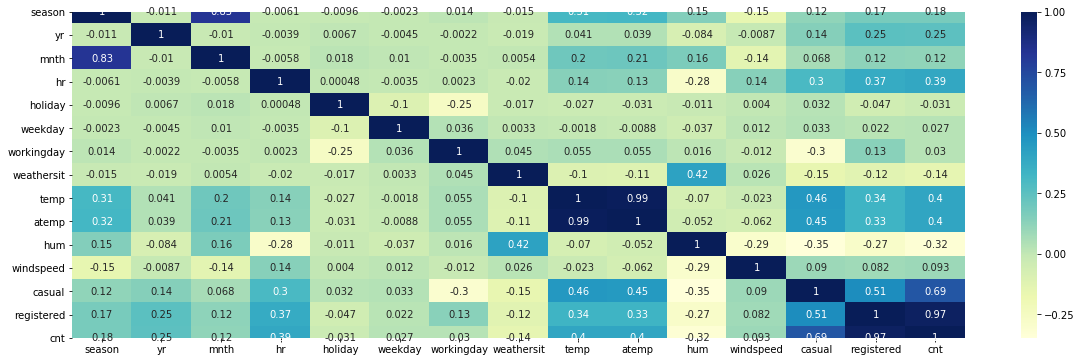

In [7]:
# Analyzing the relation between the independent and variables in the dataset.
corr = data[data.columns].corr()
plt.figure(figsize=(20,6))
sns.heatmap(corr, cmap="YlGnBu", annot = True)
# Most of the varibales have a high correlation

In [8]:
data.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


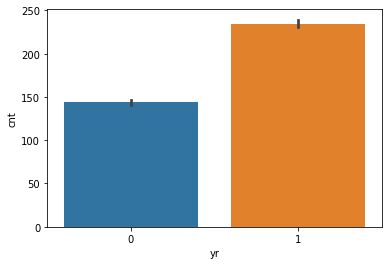

In [9]:
# Analyzing the number of bikes rented by year
sns.barplot(x='yr',y='cnt', data=data)
# The average number of bikes rented in the year 2012 is higher than 2011

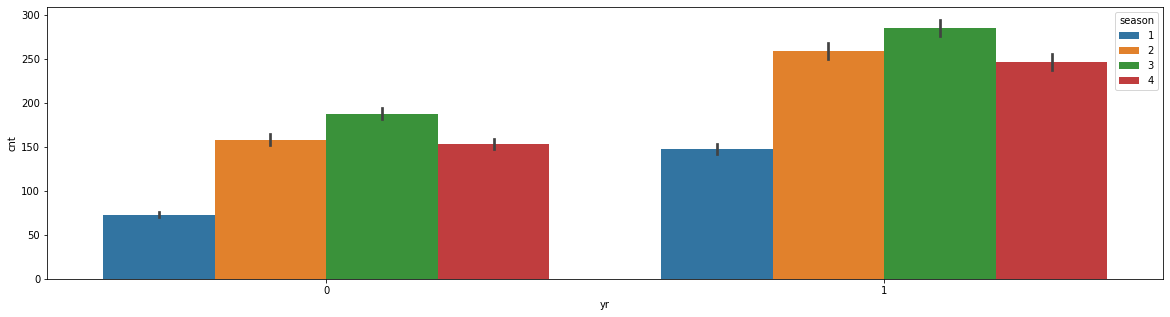

In [10]:
# Analyzing the number of bikes rented by season
plt.figure(figsize=(20,5))
sns.barplot(x='yr',y='cnt', hue='season', data=data)
# Summer is the most preferred season for bike rentals across both years

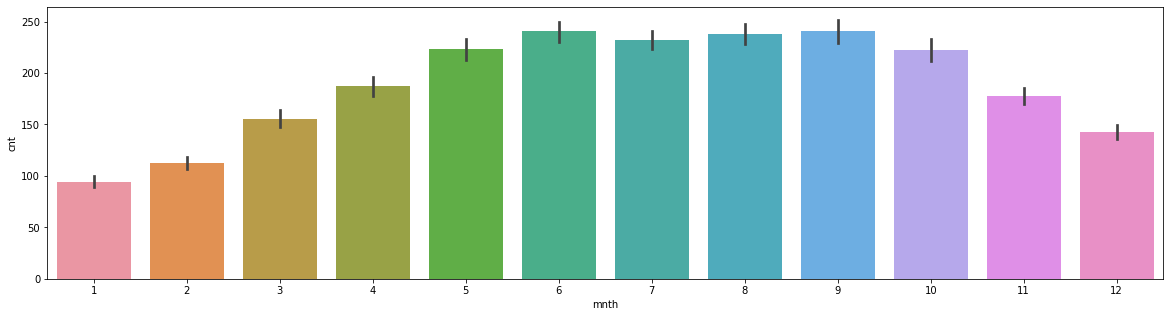

In [11]:
# Analyzing the demand for bikes on a monthly basis
plt.figure(figsize=(20,5))
sns.barplot(x='mnth',y='cnt', data=data)
# Demand for rented bikes is highest in the months of June and September

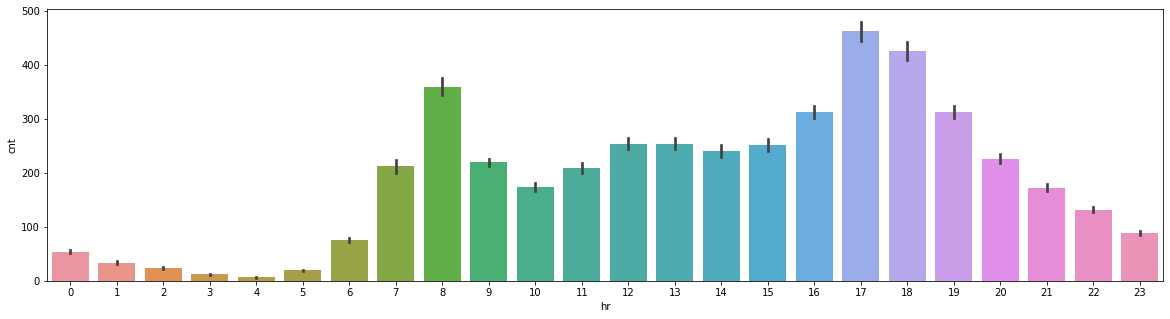

In [12]:
# Analyzing the number of bikes rented on a hourly basis
plt.figure(figsize=(20,5))
sns.barplot(x='hr',y='cnt', data=data)
# Demand for rented bikes is higher during morning 8am and in the evening from 5pm to 6pm.

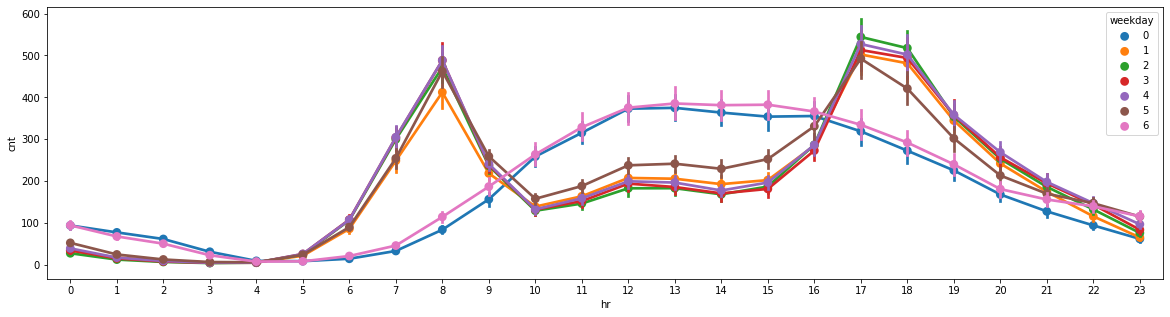

In [13]:
# Analyzing the number of bikes rented in a week
plt.figure(figsize=(20,5))
sns.pointplot(x='hr',y='cnt', hue='weekday', data=data)
# During the week, the demand for rental bikes is highest on working days (1 to 5). 
# On these days, the highest demand is in the morning around 8am and in the evening around 5pm to 6pm

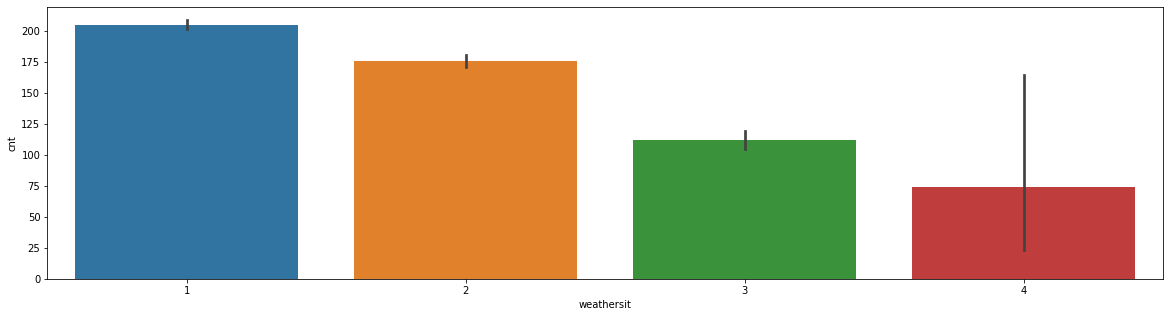

In [14]:
# Analyzing the impact of weather situation on demand for rental bikes
plt.figure(figsize=(20,5))
sns.barplot(x='weathersit',y='cnt', data=data)
# The demand for rental bikes is highest during clear weather situation 

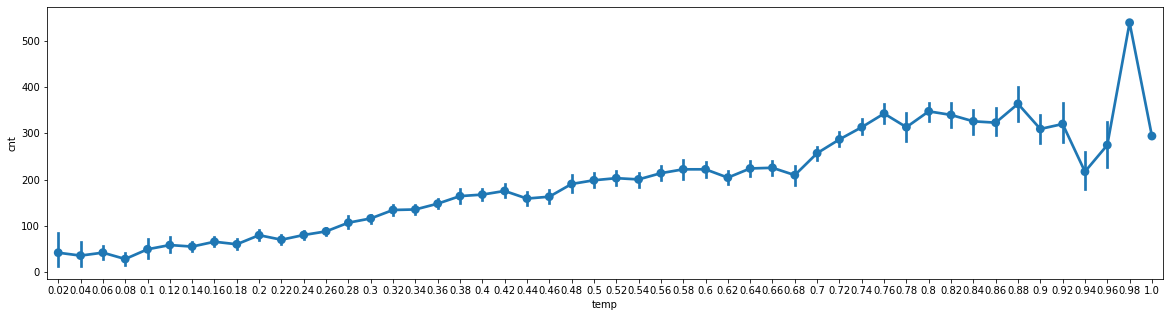

In [15]:
# Analyzing the impact of temperature on demand for rental bikes
plt.figure(figsize=(20,5))
sns.pointplot(x='temp',y='cnt', data=data)
# The demand for rental bikes increases with the rise in temperature

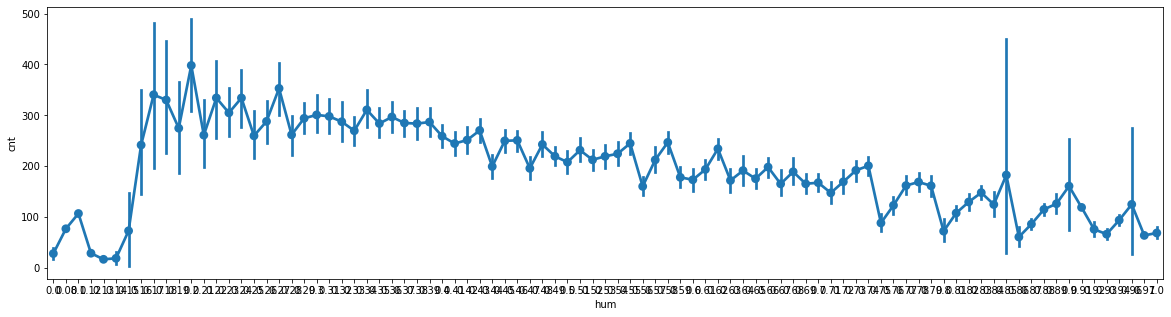

In [18]:
# Analyzing the impact of humidity on demand for rental bikes
plt.figure(figsize=(20,5))
sns.pointplot(x='hum',y='cnt', data=data)
# The demand for rental bikes decreases with the rise in humidity

In [19]:
# Analyzing the skewness in the dataset
data.skew()

season       -0.005416
yr           -0.010243
mnth         -0.009253
hr           -0.010680
holiday       5.638538
weekday      -0.002998
workingday   -0.785258
weathersit    1.228047
temp         -0.006021
atemp        -0.090429
hum          -0.111287
windspeed     0.574905
casual        2.499237
registered    1.557904
cnt           1.277412
dtype: float64

In [20]:
data.shape

(17379, 16)

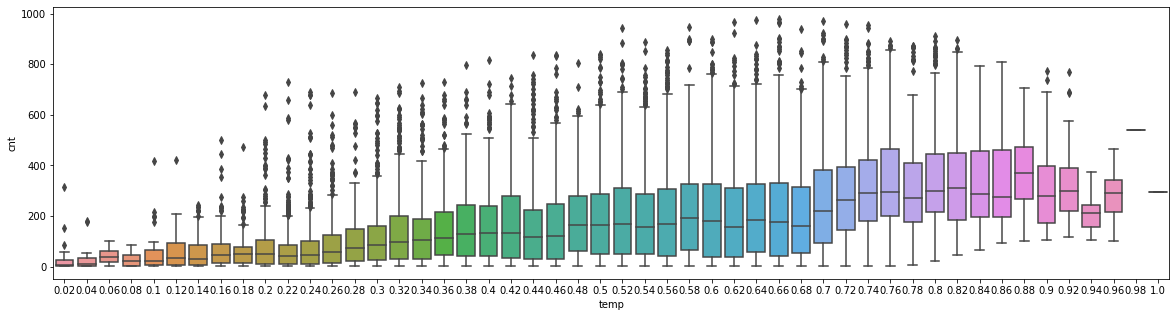

In [21]:
# Analyzing the outliers in the dataset
plt.figure(figsize=(20,5))
sns.boxplot(x='temp',y='cnt', data=data)
# The outliers are present in the temp category

In [24]:
data.drop(columns=['casual','registered','dteday'], inplace=True)
data

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [25]:
# Removing outliers
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

season          1.0000
yr              1.0000
mnth            6.0000
hr             12.0000
holiday         0.0000
weekday         4.0000
workingday      1.0000
weathersit      1.0000
temp            0.3200
atemp           0.2879
hum             0.3000
windspeed       0.1492
cnt           241.0000
dtype: float64


In [26]:
data=data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]
data.shape

(16029, 13)

In [27]:
x=data.drop(columns=['cnt'])
y=data['cnt']

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
df_x=sc.transform(x)
df_x=pd.DataFrame(x)
df_x

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343


In [29]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 16029, dtype: int64

In [30]:
y.skew()

0.9265918478354894

In [31]:
y=np.log1p(y)

In [32]:
y.skew()

-0.8558132188361682

In [33]:
# Using Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
hyperparametersdtr={'criterion':['mse','mae'],'max_depth':range(1,2)}
griddtr=GridSearchCV(dtr, hyperparametersdtr, cv=5, scoring='r2')
griddtr.fit(x,y)
print(griddtr.best_params_)

{'criterion': 'mse', 'max_depth': 1}


In [34]:
dtr=DecisionTreeRegressor('mse',max_depth=1)
df_x_train, df_x_test, y_train, y_test = train_test_split(df_x,y,random_state=42,test_size=.20)
dtr.fit(df_x_train,y_train)
predicty=dtr.predict(df_x_test)
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,predicty)))
print("r2_score is: ",r2_score(y_test,predicty))

RMSE is:  0.9037276722076308
r2_score is:  0.5764881684397197


In [35]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for r2 score is:', cross_val_score(dtr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score is: ",cross_val_score(dtr,x,y,cv=5,scoring="r2").std())

Mean cross validation score for r2 score is: 0.5202145840086831
Standard deviation in r2 score is:  0.11778272724994422


In [36]:
# Using KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
k_range = list(range(1,18))
hyperparametersknr=dict(n_neighbors=k_range)
gridknr=GridSearchCV(knr, hyperparametersknr, cv=5, scoring='r2')
gridknr.fit(x,y)
print(gridknr.best_params_)

{'n_neighbors': 8}


In [37]:
knr=KNeighborsRegressor(n_neighbors=13)
df_x_train, df_x_test, y_train, y_test = train_test_split(df_x,y,random_state=42,test_size=.20)
knr.fit(df_x_train,y_train)
predicty=knr.predict(df_x_test)
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,predicty)))
print("r2_score is: ",r2_score(y_test,predicty))

RMSE is:  0.3720286838598872
r2_score is:  0.928229951782758


In [38]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for r2 score is:', cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score is: ",cross_val_score(knr,x,y,cv=5,scoring="r2").std())

Mean cross validation score for r2 score is: 0.8113699535295551
Standard deviation in r2 score is:  0.08005306221022199


In [39]:
# Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
hyperparametersrfr={'n_estimators':[10,100,250]}
gridrfr=GridSearchCV(rfr, hyperparametersrfr, cv=5, scoring='r2')
gridrfr.fit(x,y)
print(gridrfr.best_params_)

{'n_estimators': 250}


In [40]:
rfr=RandomForestRegressor(n_estimators=250)
df_x_train, df_x_test, y_train, y_test = train_test_split(df_x,y,random_state=42,test_size=.20)
rfr.fit(df_x_train,y_train)
predicty=rfr.predict(df_x_test)
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,predicty)))
print("r2_score is: ",r2_score(y_test,predicty))

RMSE is:  0.3197258737837084
r2_score is:  0.9469914466312598


In [41]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for r2 score is:', cross_val_score(rfr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score is: ",cross_val_score(rfr,x,y,cv=5,scoring="r2").std())

Mean cross validation score for r2 score is: 0.903941616983477
Standard deviation in r2 score is:  0.036260317648789446


In [43]:
# Among all the models, Random Forest Regressor model is the best performing model
# Saving the Random Forest Regressor model
from sklearn.externals import joblib 
joblib.dump(rfr, 'Bike_Sharing_rfr.pkl')

['Bike_Sharing_rfr.pkl']